In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
df = pd.read_csv("data_csv_Romance.csv")
df.head()

,name,year,rating,genre,description
0,Licorice Pizza,2021,7.4,"Comedy, Drama, Romance",The story of Alana Kane and Gary Valentine gro...
1,West Side Story,2021,7.3,"Crime, Drama, Musical","An adaptation of the 1957 musical, West Side S..."
2,The Power of the Dog,2021,6.9,"Drama, Romance, Western",Charismatic rancher Phil Burbank inspires fear...
3,Verdens verste menneske,2021,7.9,"Comedy, Drama, Romance",The chronicles of four years in the life of Ju...
4,365 dni,2020,3.4,"Drama, Romance",Massimo is a member of the Sicilian Mafia fami...


In [ ]:
import nltk
from nltk.stem.snowball import SnowballStemmer
import re

nltk.download('punkt')
# Define tokenize_stem
def tokenize_stem(text) :

  stemmer = SnowballStemmer("english")

  tokens = [word for sent in nltk.sent_tokenize(text) for word in nltk.word_tokenize(sent)]

  filtered_tokens = [token for token in tokens if re.search("[a-zA-Z0-9]", token)]

  stem_tokens = [stemmer.stem(token) for token in filtered_tokens]

  return stem_tokens

  

tokenize_stem("When the Riddler, a sadistic serial killer, begins murdering key political figures in Gotham, Batman is forced to investigate the city's hidden corruption and question his family's involvement.")

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


['when',
 'the',
 'riddler',
 'a',
 'sadist',
 'serial',
 'killer',
 'begin',
 'murder',
 'key',
 'polit',
 'figur',
 'in',
 'gotham',
 'batman',
 'is',
 'forc',
 'to',
 'investig',
 'the',
 'citi',
 "'s",
 'hidden',
 'corrupt',
 'and',
 'question',
 'his',
 'famili',
 "'s",
 'involv']

In [ ]:
df["score"] = np.where(df["rating"] >= 8.0, "Very Good", df["rating"])
df["score"] = np.where((df["rating"] >= 7.0) & (df["rating"] < 8.0), "Good", df["rating"])
df["score"] = np.where((df["rating"] >= 5.0) & (df["rating"] < 7.0), "Average", df["rating"])
df["score"] = np.where(df["rating"] < 5.0, "Below Average", df["rating"])


# Creating soup column

def soup() :

  return df["score"] + " " + df["genre"].str.replace(",", "") + " " + df["description"]

df["soup"] = soup()

df[df["name"] == "The Dark Knight"]

,name,year,rating,genre,description,score,soup


In [ ]:
#Tf-idf Vectorizer

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

tfidf_vectorizer = TfidfVectorizer(use_idf = True, stop_words = "english")
tfidf_matrix = tfidf_vectorizer.fit_transform(df["soup"])

print(tfidf_matrix.shape)

cosine_sim2 = cosine_similarity(tfidf_matrix, tfidf_matrix)

(150, 1394)


In [ ]:
#Indices

indices = pd.Series(df.index, index = df["name"]).drop_duplicates()

print(indices)

name
Licorice Pizza               0
West Side Story              1
The Power of the Dog         2
Verdens verste menneske      3
365 dni                      4
                          ... 
Sixteen Candles            145
Gehraiyaan                 146
Marriage Story             147
Cast Away                  148
Beauty and the Beast       149
Length: 150, dtype: int64


In [ ]:
#Recommendation function

def get_recommendation(title, cosine_sim) :
  idx = indices[title]
  similarity_scores = list(enumerate(cosine_sim[idx]))
  similarity_scores = sorted(similarity_scores, key = lambda x : x[1], reverse = True)
  similarity_scores = similarity_scores[1 : 11]

  movies_indices = [ind[0] for ind in similarity_scores]
  movies = df["name"].iloc[movies_indices]

  return movies

print(get_recommendation("Eternal ", cosine_sim2))

94                            Pretty Woman
132                    Legends of the Fall
47                                  Malèna
141                    The English Patient
97                      Sweet Home Alabama
46                          La vie d'Adèle
137                         Nine 1/2 Weeks
23                      The Princess Bride
108    The Curious Case of Benjamin Button
100                          Me Before You
Name: name, dtype: object


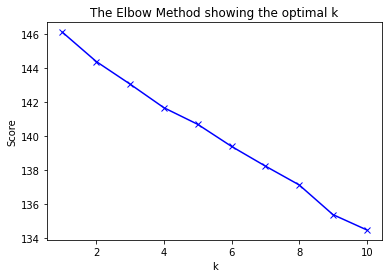

In [ ]:
# KMeans

from sklearn.cluster import KMeans

krange = range(1,11)

scores = []
for k in krange :
  km_new = KMeans(n_clusters = k)
  km_new.fit(tfidf_matrix)
  scores.append(km_new.inertia_)

  
plt.plot(krange, scores, 'bx-')
plt.xlabel('k')
plt.ylabel('Score')
plt.title('The Elbow Method showing the optimal k')
plt.show()